# Load Packages and Data

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP.cluster import compute_linkage

# $K$-Means Clustering
- We use the estimator `sklearn.cluster.KMeans()` to perform $K$-means clustering.
- We begin with a simple simulated example in which there are truly two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

In [64]:
# Simulated data
np.random.seed(0);
X = np.random.standard_normal([50,2]);
X[:25,0] += 3;
X[:25,1] -= 4

In [30]:
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)

In [ ]:
# Labels assigned by KMeans to the observations
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

- The $K$-means clustering separates the observations into two distinct clusters perfectly even though we did not supply any information about the true cluster assignments of the observations.
- We plot the data with each observation got different shape based on the cluster assignment.

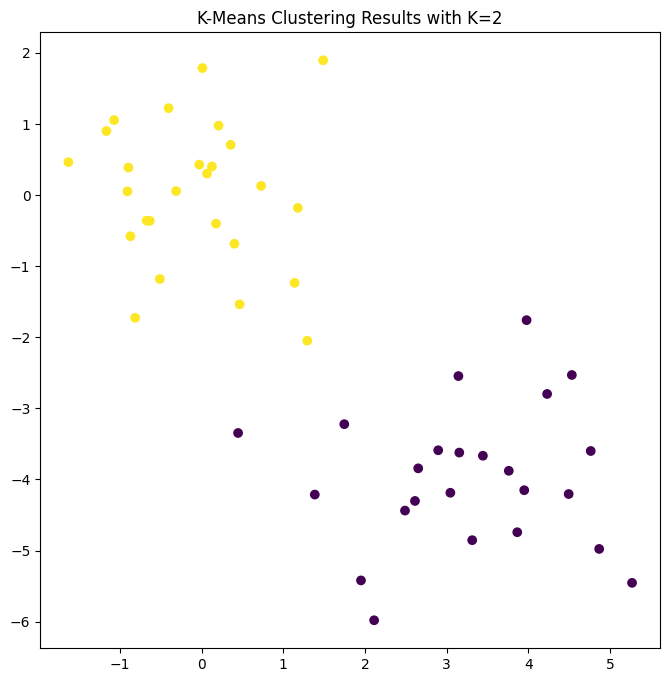

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

- The data has two dimensions, so we can plot easily. If the data has more dimensions, we can use PCA and plot the first two principal component scores vectors to represent the clusters.
- If we perform $K$-means clustering on this data with $K = 3$:

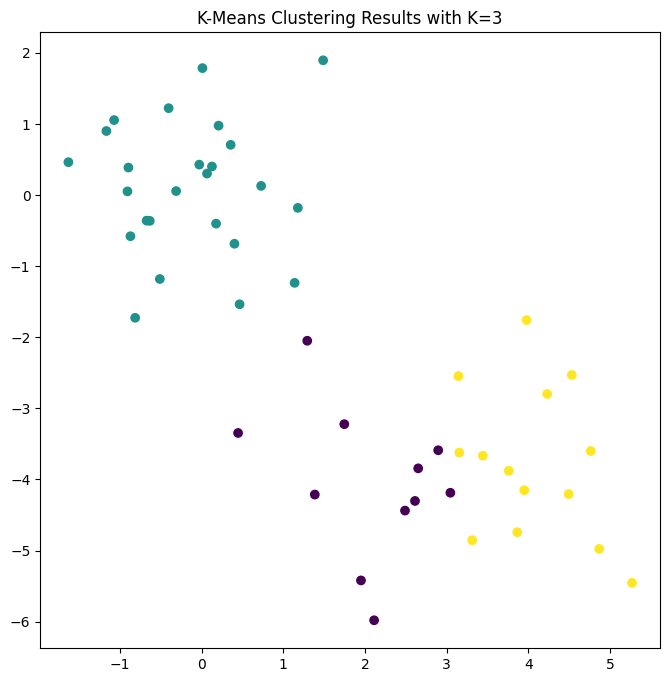

In [54]:
kmeans = KMeans(n_clusters=3, random_state=3, n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

- When (K=3), (K)-means clustering splits up the two clusters into smaller groups.
- The ``n_init`` argument specifies the number of initial cluster assignments to run.
    - We use ``n_init=20`` to run $K$-means with 20 initial cluster assignments (the default is 10).
    - If ``n_init`` is greater than 1, $K$-means clustering will run with multiple random assignments in Step 1 of the below algorithm.
- We compare using ``n_init=1`` and ``n_init=20``.
![Algorithm 12.2](https://imgur.com/xtOQyH2.png)

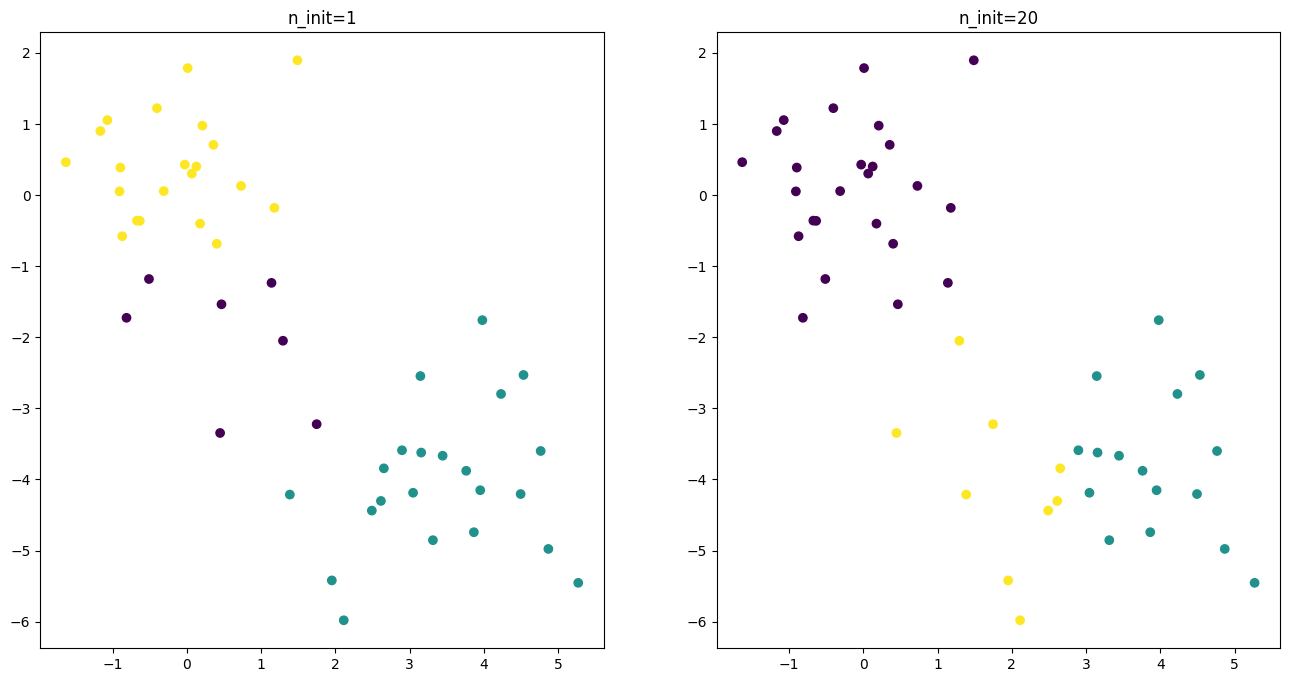

In [57]:
kmeans1 = KMeans(n_clusters=3, random_state=2, n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3, random_state=2, n_init=20).fit(X)
# Plot the data with different colors for each cluster
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans1.labels_)
ax[1].scatter(X[:, 0], X[:, 1], c=kmeans20.labels_)
ax[0].set_title('n_init=1'); ax[1].set_title('n_init=20');


In [58]:
kmeans1.inertia_, kmeans20.inertia_

(77.18931183464504, 75.03508259100438)

- The `kmeans.inertia_` is the total within-cluster sum of squares, which we want to minimize by performing $K$-means clustering as the equation below.
$$\underset{C_1, \ldots, C_K}{\text{minimize}} \left\{ \sum_{k=1}^K \frac{1}{|C_k|} \sum_{i' \in C_k} \sum_{j=1}^p (x_{i'j} - x_{i'j})^2 \right\}$$
- We recommend running $K$-means clustering with large ``n_init`` values, such as 20 or 50 because otherwise, the results may be an undesirable local optimum.
- We should use the ``random_state`` argument to ensure reproducibility.

# Hierarchical Clustering
- We use ``AgglomerativeClustering`` class from ``sklearn.cluster`` to perform hierarchical clustering.
- We shorthand the class name to ``HClust`` for hierarchical clustering.
- We use the simulated data to plot the hierarchical clustering dendrogram using:
    - Single linkage
    - Complete linkage
    - Average linkage
    - We do that with Euclidean distance as the dissimilarity measure.
## Complete Linkage
- This computes the entire dendrogram.
- ``n_clusters=None`` means that the algorithm will not stop at a predefined number of clusters. Instead, it will create a full hierarchical clustering tree (dendrogram).
- ``distance_threshold=0`` means that the algorithm will not stop early and continues until each point is its own cluster, effectively creating the full dendrogram.
    - ``distance_threshold`` is a parameter to determine the clusters based on a specified distance.

In [61]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete').fit(X);

- We use ``dendrogram()`` from ``scipy.cluster.hierarchy`` to plot the dendrogram.
- ``dendrogram()`` requires a linkage_matrix representation of the clustering. But ``AgglomerativeClustering`` does not provide this directly.
- ``complete_linkage`` from ``ISLP.cluster`` can provide the linkage matrix representation of the clustering.
- In the plot:
    - The numbers at the bottom of the plot identify each observation.
    - ``dendrogram()`` use colors different branches of the tree to suggest a pre-defined cut at a particular depth. We can overwrite this default behavior by setting the threshold to be infinite.

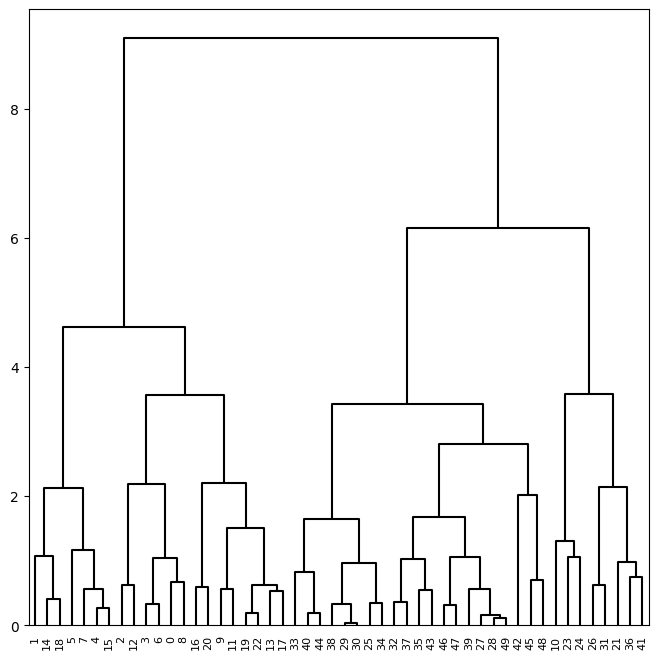

In [ ]:
# Linkage matrix representation
linkage_comp = compute_linkage(hc_comp)
# Dendrogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, color_threshold=-np.inf,
           above_threshold_color='k');

- We color the branches of the dendrogram.
- We cut the three at the height of 4.

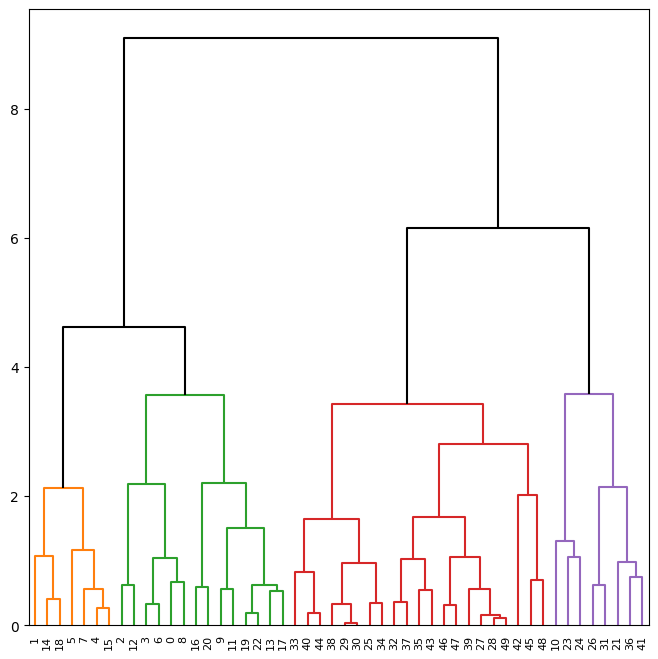

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, color_threshold=4,
           above_threshold_color='k');

- We use ``cut_tree()`` from ``scipy.cluster.hierarchy`` determine the cluster labels for each observation given the height of the cut.
- Other ways to cut the dendrogram to form clusters:
    - Using ``n_clusters`` in ``HClust()``. However, each cut would require recomputing the clustering.
    - Using ``distance_threshold`` in ``HClust()``. This allows us to cut the dendrogram at a specific height.
    - Using ``cut_tree()`` and specifying the ``height`` argument to cut the tree at a specific height.

In [87]:
cut_tree(linkage_comp, n_clusters=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

In [89]:
cut_tree(linkage_comp, height=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

- We perform hierarchical clustering on scaled simulated data.

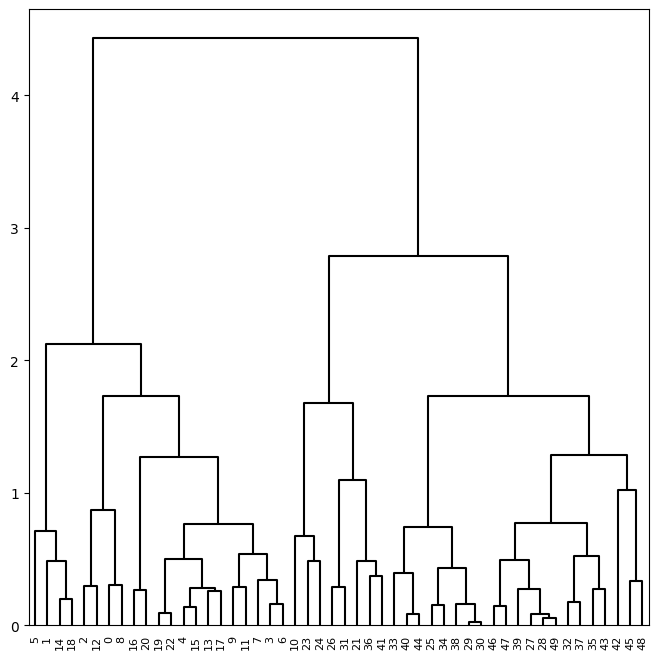

In [90]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0, n_clusters=None, linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, color_threshold=-np.inf,
           above_threshold_color='k');

- Correlation-based distances between observations can be used for clustering.
- The correlation between two observations measures the similarity of their feature values.
- Measuring Similarity:
    - Feature Values: Suppose each observation has (p) features, each a single numerical value.
    - Correlation: The similarity of two observations is measured by computing the correlation of these (p) pairs of numbers.
- Correlation Matrix (n x n):
    - Correlation Matrix: With (n) observations, the (n x n) correlation matrix contains the pairwise correlations between all observations. It can be used as a similarity (or affinity) matrix.
    - Dissimilarity Matrix: One minus the correlation matrix is used as the dissimilarity matrix for clustering.
- Using correlation for clustering only makes sense for data with at least three features because:
    - With two features: The absolute correlation between any two observations with measurements on only two features is always one.
    - With three or more features: Correlation can meaningfully measure the similarity between observations when there are at least three features.
    - Hence, we use cluster a three-dimensional data set.
- `metric='precomputed'` indicates that the input data is a precomputed distance matrix.

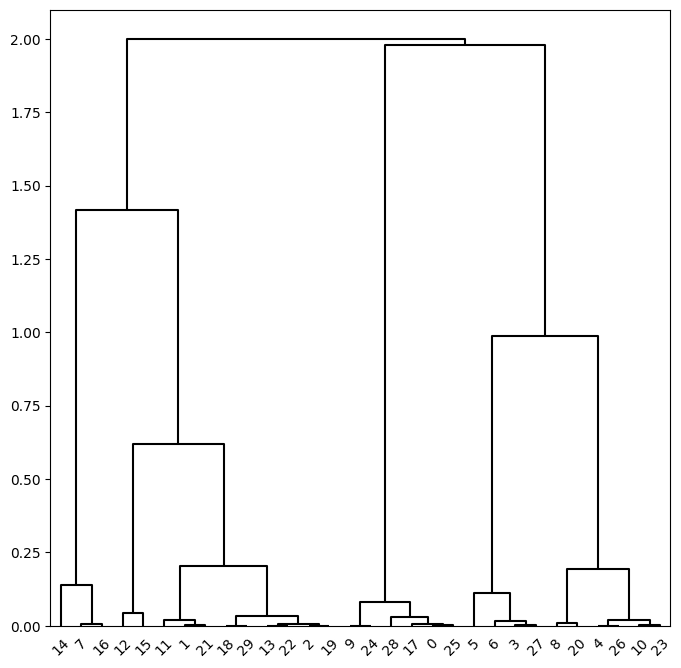

In [91]:
# Simulated data
X = np.random.standard_normal((30, 3))
# Dissimilarity matrix
corD = 1 - np.corrcoef(X)
# Hierarchical clustering
hc_cor = HClust(linkage='complete', distance_threshold=0,
        n_clusters=None, metric='precomputed').fit(corD)
# Plot the dendrogram
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor, ax=ax, color_threshold=-np.inf,
           above_threshold_color='k');

## Average and Single Linkage

In [62]:
hc_avg = HClust(distance_threshold=0, n_clusters=None, linkage='average').fit(X)
hc_sing = HClust(distance_threshold=0, n_clusters=None, linkage='single').fit(X);

- To use a precomputed distance matrix with ``AgglomerativeClustering``, we set ``metric='precomputed'``. This tells the algorithm that the input matrix is a distance matrix rather than raw data points.
- We first compute the $(50 \times 50)$ pairwise-distance `D`.
- Euclidean distance is pairwise distances between each row in the matrix.

In [74]:
D = np.zeros((50, 50)) # 50 = X.shape[0]
for i in range(X.shape[0]): # 0 to 49
    # x_ is a 50x2 matrix, where each row is the same as X[i]
    x_ = np.multiply.outer(np.ones(50), X[i])
    # D[i] is a 50x1 matrix, where each element is the Euclidean distance between X[i] and X
    D[i] = np.sqrt(np.sum((X - x_)**2, axis=1))

- We perform hierarchical clustering with precomputed distance matrix using single linkage.

In [75]:
hc_sing_pre = HClust(distance_threshold=0, n_clusters=None,
        metric='precomputed', linkage='single').fit(D);